In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from collections import Counter
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

In [2]:
drugs_df = pd.read_csv('Data/drugs.csv')

In [3]:
drugs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 255 non-null    int64 
 1   image_link                 255 non-null    object
 2   title                      255 non-null    object
 3   description                255 non-null    object
 4   usages                     255 non-null    object
 5   benefits                   255 non-null    object
 6   side_effects               255 non-null    object
 7   side_effect_common         255 non-null    object
 8   how_it_works               255 non-null    object
 9   alcohol_side_effect        8 non-null      object
 10  pregnancy_side_effect      255 non-null    object
 11  breastfeeding_side_effect  255 non-null    object
 12  driving_side_effect        8 non-null      object
 13  kidney_side_effect         8 non-null      object
 14  liver_side

### Dataset Info
- There are 255 entries in the dataset.
- The dataset contains 19 columns.
- Many columns have alcohol_side_effect, driving_side_effect, kidney_side_effect, and liver_side_effect. 

In [4]:
drugs_df.head()

,Unnamed: 0,image_link,title,description,usages,benefits,side_effects,side_effect_common,how_it_works,alcohol_side_effect,pregnancy_side_effect,breastfeeding_side_effect,driving_side_effect,kidney_side_effect,liver_side_effect,price,qty,category,link
0,0,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Tretin 0.025% Cream,Tretin 0.025% Cream is a form of vitamin A tha...,Treatment of Acne+Acute promyelocytic leukaemia,Tretin 0.025% Cream is a form of vitamin A tha...,Tretin 0.025% Cream is a form of vitamin A tha...,Erythema (skin redness) + Skin irritation + Dr...,Tretin 0.025% Cream is a form of vitamin A tha...,NaN,Tretin 0.025% Cream may be unsafe to use durin...,Tretin 0.025% Cream is probably safe to use du...,NaN,NaN,NaN,NaN,30 gm in 1 tube,acne-pimples,https://www.1mg.com/drugs/tretin-0.025-cream-1...
1,1,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Benzac AC 2.5% Gel,Benzac AC 2.5% Gel is an anti-bacterial medici...,Treatment of Acne,Benzac AC 2.5% Gel is an anti-bacterial medici...,Benzac AC 2.5% Gel is an anti-bacterial medici...,Dry skin + Erythema (skin redness) + Burning s...,Benzac AC 2.5% Gel is an anti-bacterial medici...,NaN,Benzac AC 2.5% Gel may be unsafe to use during...,Benzac AC 2.5% Gel is probably safe to use dur...,NaN,NaN,NaN,₹99,30 gm in 1 tube,acne-pimples,https://www.1mg.com/drugs/benzac-ac-2.5-gel-67...
2,2,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Benzonix Gel Wash,Benzonix Gel Wash is an anti-bacterial medicin...,Treatment of Acne,Benzonix Gel Wash is an anti-bacterial medicin...,Benzonix Gel Wash is an anti-bacterial medicin...,Dry skin + Erythema (skin redness) + Burning s...,Benzonix Gel Wash is an anti-bacterial medicin...,NaN,Benzonix Gel Wash may be unsafe to use during ...,Benzonix Gel Wash is probably safe to use duri...,NaN,NaN,NaN,₹139,50 gm in 1 tube,acne-pimples,https://www.1mg.com/drugs/benzonix-gel-wash-51...
3,3,"https://onemg.gumlet.io/l_watermark_346,w_480,...",A-Ret 0.1% Gel,A-Ret 0.1% Gel is a form of vitamin A that is ...,Treatment of Acne+Acute promyelocytic leukaemia,A-Ret 0.1% Gel is a form of vitamin A that is ...,A-Ret 0.1% Gel is a form of vitamin A that is ...,Erythema (skin redness) + Skin irritation + Dr...,A-Ret 0.1% Gel is a form of vitamin A that is ...,NaN,A-Ret 0.1% Gel may be unsafe to use during pre...,A-Ret 0.1% Gel is probably safe to use during ...,NaN,NaN,NaN,₹156,20 gm in 1 tube,acne-pimples,https://www.1mg.com/drugs/a-ret-0.1-gel-279453
4,4,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Tretin 0.05% Cream,Tretin 0.05% Cream is a form of vitamin A that...,Treatment of Acne+Acute promyelocytic leukaemia,Tretin 0.05% Cream is a form of vitamin A that...,Tretin 0.05% Cream is a form of vitamin A that...,Erythema (skin redness) + Skin irritation + Dr...,Tretin 0.05% Cream is a form of vitamin A that...,NaN,Tretin 0.05% Cream may be unsafe to use during...,Tretin 0.05% Cream is probably safe to use dur...,NaN,NaN,NaN,₹189,30 gm in 1 tube,acne-pimples,https://www.1mg.com/drugs/tretin-0.05-cream-33121


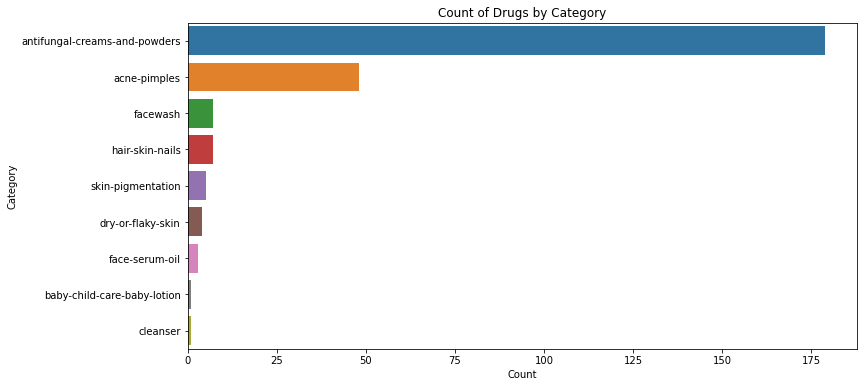

In [5]:
plt.figure(figsize=(12, 6))
sns.countplot(y="category", data=drugs_df, order=drugs_df['category'].value_counts().index)
plt.title("Count of Drugs by Category")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

### Observation:
- The category "acne-pimples" has the most entries, showing that there are several acne and pimples.
- This is followed by categories such as "acidity", "allergy", "abdominal-pain" and so on.


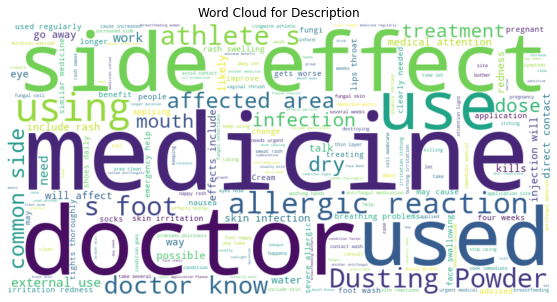

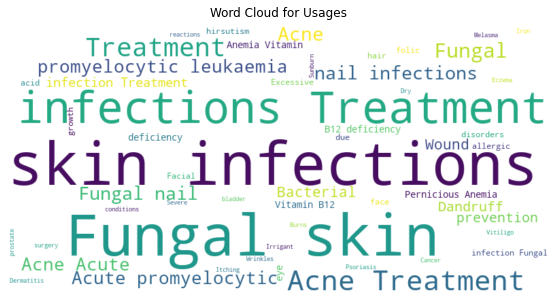

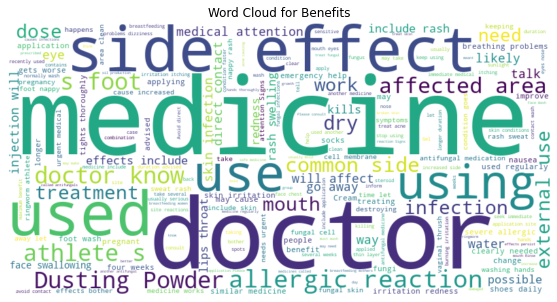

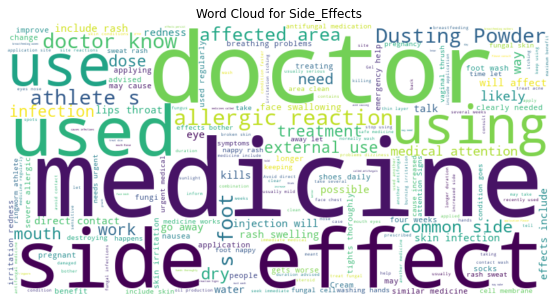

In [6]:
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

columns_to_visualize = ['description', 'usages', 'benefits', 'side_effects']
for column in columns_to_visualize:
    text_data = ' '.join(drugs_df[column].dropna())
    generate_wordcloud(text_data, f"Word Cloud for {column.title()}")

### Observation:

**Description:** 
The phrases "skin", "gel", "cream", "used", and "treatment" stand out significantly, indicating that many of the medications in this dataset are topicals for skin treatment.


**Usages:**
The words "acne", "pimples", "skin", and "infections" predominate, indicating an emphasis on skin-related disorders.


**Benefits:**
The words "skin", "acne", "bacteria", and "infections" are highlighted.


**Adverse Reactions:** 
Words such as "skin", "dry", "burning", "irritation", and "peeling" are evident, signifying frequent medication adverse effects.


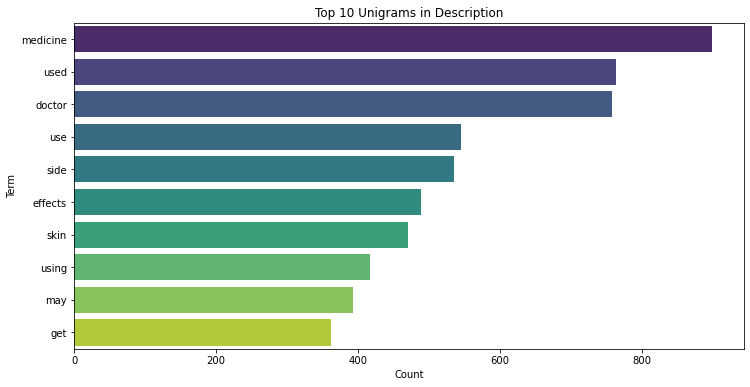

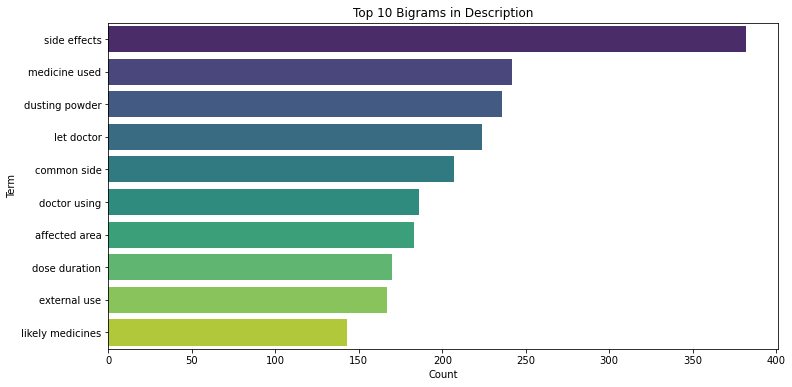

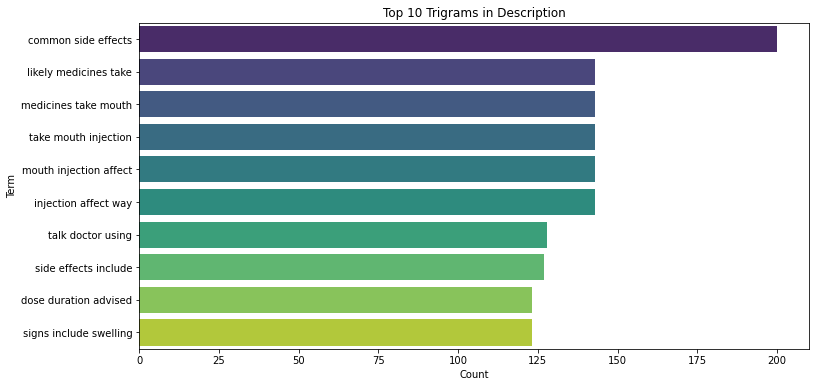

In [10]:
description_tokens = ' '.join(drugs_df['description'].dropna()).lower().split()

description_filtered_tokens = [word for word in description_tokens if word not in stop_words and word.isalnum()]

description_unigrams = description_filtered_tokens
description_bigrams = list(nltk.bigrams(description_filtered_tokens))
description_trigrams = list(nltk.trigrams(description_filtered_tokens))

description_unigram_counts = Counter(description_unigrams).most_common(10)
description_bigram_counts = Counter(description_bigrams).most_common(10)
description_trigram_counts = Counter(description_trigrams).most_common(10)

def plot_top_terms(counter, title, kind='word'):
    terms = [item[0] for item in counter]
    counts = [item[1] for item in counter]
    
    if kind == 'bigram':
        terms = [' '.join(item[0]) for item in counter]
    elif kind == 'trigram':
        terms = [' '.join(item[0]) for item in counter]
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=counts, y=terms, palette='viridis')
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel('Term')
    plt.show()

plot_top_terms(description_unigram_counts, "Top 10 Unigrams in Description")
plot_top_terms(description_bigram_counts, "Top 10 Bigrams in Description", kind='bigram')
plot_top_terms(description_trigram_counts, "Top 10 Trigrams in Description", kind='trigram')

### Observation:

**Unigrams:**

- Words like "skin", "used", "gel", "cream", and "acne" are frequently used in drug descriptions.

**Bigrams:**

- Drug descriptions frequently include phrases like "used to treat", "skin infections", and "form vitamin".

**Trigrams:**

- Some of the typical trigrams are "form vitamin used", "gel form vitamin", and "treat skin infections".


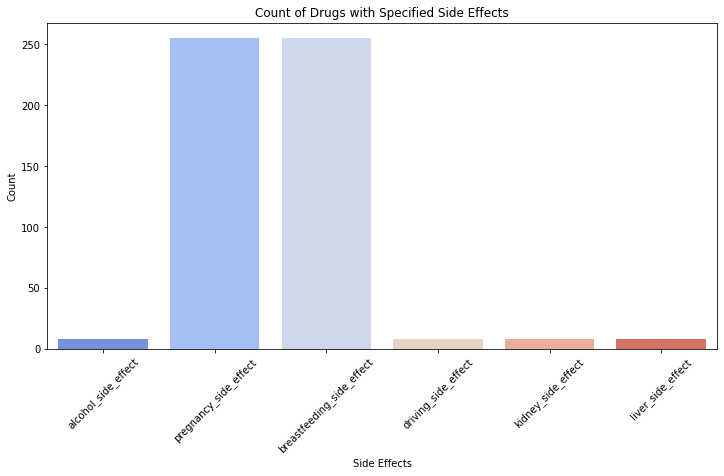

In [15]:
side_effect_columns = ['alcohol_side_effect', 'pregnancy_side_effect', 'breastfeeding_side_effect', 
                       'driving_side_effect', 'kidney_side_effect', 'liver_side_effect']

side_effect_counts = drugs_df[side_effect_columns].notna().sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=side_effect_counts.index, y=side_effect_counts.values, palette='coolwarm')
plt.title("Count of Drugs with Specified Side Effects")
plt.xlabel("Side Effects")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### Observation:

**Pregnancy and Breastfeeding adverse Effects:** Almost every medicine in the dataset has linked pregnancy and breastfeeding adverse effects or precautions.

**Alcohol, Driving, Kidney, and Liver Side Effects:** These side effects are less common throughout the dataset, with only a few medicines explicitly mentioning them.
